In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Q1

In [62]:
data = pd.read_csv("salary_experience.csv")
X = data['experience'].values
y = data['salary'].values

In [23]:
def mse(df,m,b):
    err=0
    for x,y in zip(df['experience'],df['salary']):
        err+=(m(x)+b-y)*2
        print(m(x)+b)
        return np.mean(err)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


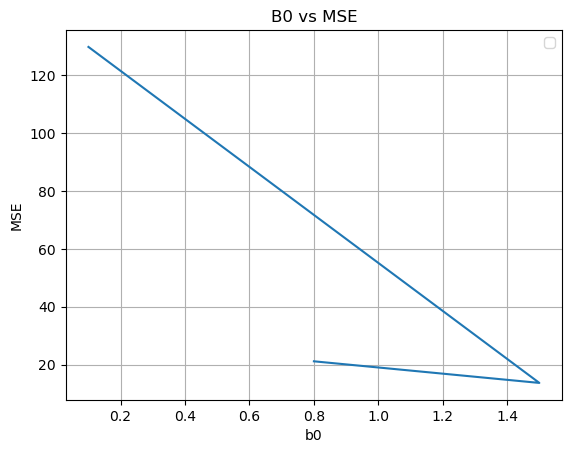

In [24]:
import matplotlib.pyplot as plt

# plt.scatter(X, y, color='red', label='Data Points')


def mse(y,y_pred):
    summ = 0
    for i in range(len(y)):
        summ += (y[i]-y_pred[i])**2
    summ = np.mean(summ)
    return summ
def calc(b1):
    y_pred = []
    for i in range(len(X)):
        y_pred.append(1.1+X[i]*b1)
    return y_pred

vals = [0.1,1.5,0.8]
mse_vals = []
for i in vals:
    y_pred = calc(i)
    mse_vals.append(mse(y,y_pred))

plt.plot(vals, mse_vals)

plt.xlabel('b0')
plt.ylabel('MSE')
plt.title('B0 vs MSE')
plt.legend()
plt.grid(True)
plt.show()

# Q2

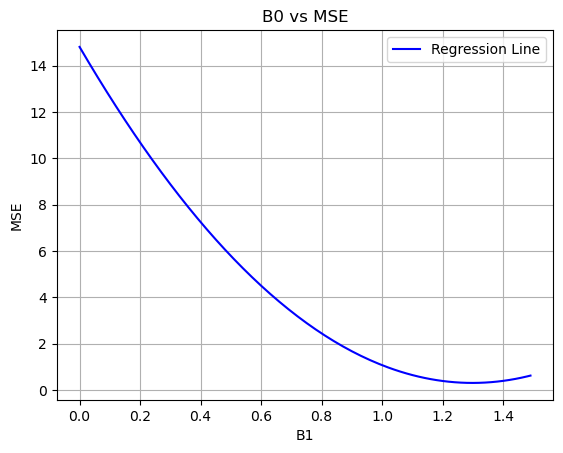

In [25]:
b1_vals = np.arange(0,1.5,0.01)
b0 = 0.8
mse_vals = []

def mse(y,y_pred):
    summ = 0
    for i in range(len(y)):
        summ += (y[i]-y_pred[i])**2
    summ/=len(y)
    return summ

def calc(b1):
    y_pred = []
    for i in range(len(X)):
        y_pred.append(b0+X[i]*b1)
    return y_pred

mse_vals = []
for i in b1_vals:
    y_pred = calc(i)
    mse_vals.append(mse(y,y_pred))


plt.plot(b1_vals, mse_vals, color='blue', label='Regression Line')

plt.xlabel('B1')
plt.ylabel('MSE')
plt.title('B0 vs MSE')
plt.legend()
plt.grid(True)
plt.show()

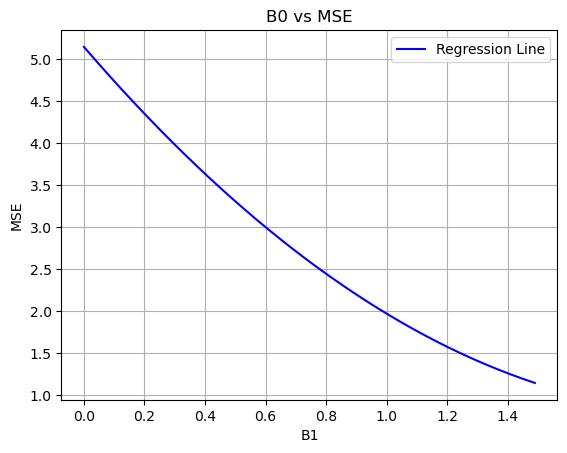

In [28]:
b0_vals  = np.arange(0,1.5,0.01)
b1 = 0.8
def calc(b0):
    y_pred = []
    for i in range(len(X)):
        y_pred.append(b0+X[i]*b1)
    return y_pred

mse_vals = []
for i in b0_vals:
    y_pred = calc(i)
    mse_vals.append(mse(y,y_pred))



plt.plot(b0_vals, mse_vals, color='blue', label='Regression Line')

plt.xlabel('B1')
plt.ylabel('MSE')
plt.title('B0 vs MSE')
plt.legend()
plt.grid(True)
plt.show()from sklearn.metrics import log_loss

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

experience = X.reshape(-1, 1)
salary = y
# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(experience, salary)

# Predict the salary based on the experience
salary_pred = model.predict(experience)

# Calculate the Mean Squared Error
mse = mean_squared_error(salary, salary_pred)

print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.23366710810280558


Final parameters: b0 = 6.579971421523851e-10, b1 = 0.025032634720411936


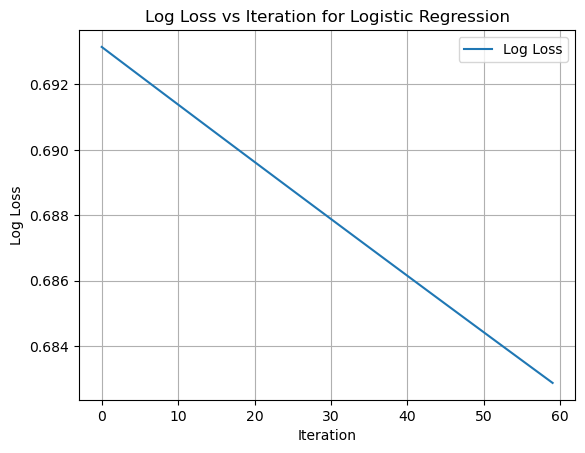

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define log loss function
def compute_log_loss(y_true, y_pred_prob):
    epsilon = 1e-10  # Small constant to avoid log(0)
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

# Prepare data
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Given y

# Normalize features
mean_X = X.mean()
std_X = X.std()
X_normalized = (X - mean_X) / std_X

# Initialize parameters
b0 = 0.0
b1 = 0.0
learning_rate = 0.001
iterations = 60

# List to store log loss at each iteration
log_loss_list = []

# Gradient Descent for Logistic Regression
for iteration in range(iterations):
    # Compute predictions using sigmoid function
    z = b0 + b1 * X_normalized
    predictions = sigmoid(z)
    
    # Compute log loss
    log_loss = compute_log_loss(y, predictions)
    log_loss_list.append(log_loss)
    
    # Compute gradients
    error = predictions - y
    gradient_b0 = np.mean(error)
    gradient_b1 = np.mean(error * X_normalized)
    
    # Update parameters
    b0 -= learning_rate * gradient_b0
    b1 -= learning_rate * gradient_b1

# Print final parameters
print(f"Final parameters: b0 = {b0}, b1 = {b1}")

# Plot Log Loss vs Iterations
plt.plot(range(iterations), log_loss_list, label='Log Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Iteration for Logistic Regression')
plt.legend()
plt.grid(True)
plt.show()


Predicted probability for input value 1.4 using sklearn: 0.9026852955130379
Log Loss using sklearn: 0.29407719498761864


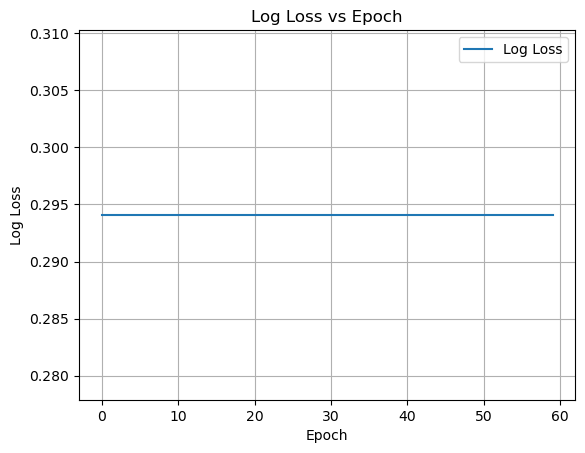

In [72]:
y = np.array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])  # Binary target
from sklearn.metrics import log_loss
# Normalize features
mean_X = X.mean()
std_X = X.std()
X_normalized = (X - mean_X) / std_X

# Train logistic regression model
model = LogisticRegression(solver='liblinear')  # solver='liblinear' is good for small datasets
model.fit(X_normalized.reshape(-1, 1), y)

# Predict probabilities for a single input
predicted_prob = model.predict_proba([[1.4]])[0, 1]  # Probability of class 1
print(f"Predicted probability for input value 1.4 using sklearn: {predicted_prob}")

# Predict probabilities for entire dataset
y_pred_prob = model.predict_proba(X_normalized.reshape(-1, 1))[:, 1]

# Compute and print Log Loss
log_loss_value = log_loss(y, y_pred_prob)
print(f"Log Loss using sklearn: {log_loss_value}")

# Simulate log_loss_list for demonstration (replace with actual values if tracking manually)
log_loss_list = [log_loss_value] * 60  # Placeholder for actual values

# Plot Log Loss vs Iterations
plt.plot(range(len(log_loss_list)), log_loss_list, label='Log Loss')
plt.xlabel('Epoch')
plt.ylabel('Log Loss')
plt.title('Log Loss vs Epoch')
plt.legend()
plt.grid(True)
plt.show()

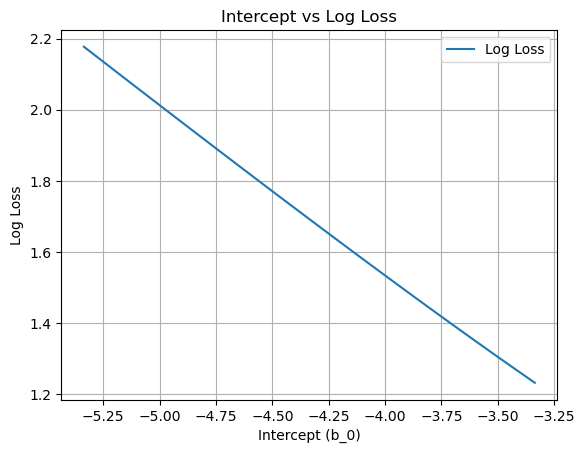

In [58]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
# Example data (log loss usually requires probabilities, so this is just illustrative)
X = X.reshape(-1, 1)  # Dummy binary outcomes
y = 0,0,0,0,0,0,1,1,1,1,1,1
# Train the model
model = LogisticRegression()
model.fit(X, y)

# Get the original intercept (b_0)
original_intercept = model.intercept_

# Create a range of intercept values to test
intercept_values = np.linspace(original_intercept - 1, original_intercept + 1, 100)
log_losses = []

for intercept_val in intercept_values:
    # Adjust predictions based on the intercept
    y_pred = model.predict(X) + intercept_val
    y_pred_prob = 1 / (1 + np.exp(-y_pred))  # Convert to probabilities
    log_loss_value = log_loss(y, y_pred_prob)
    log_losses.append(log_loss_value)

# Plot
plt.plot(intercept_values, log_losses, label='Log Loss')
plt.xlabel('Intercept (b_0)')
plt.ylabel('Log Loss')
plt.title('Intercept vs Log Loss')
plt.legend()
plt.grid(True)
plt.show()


# Q3

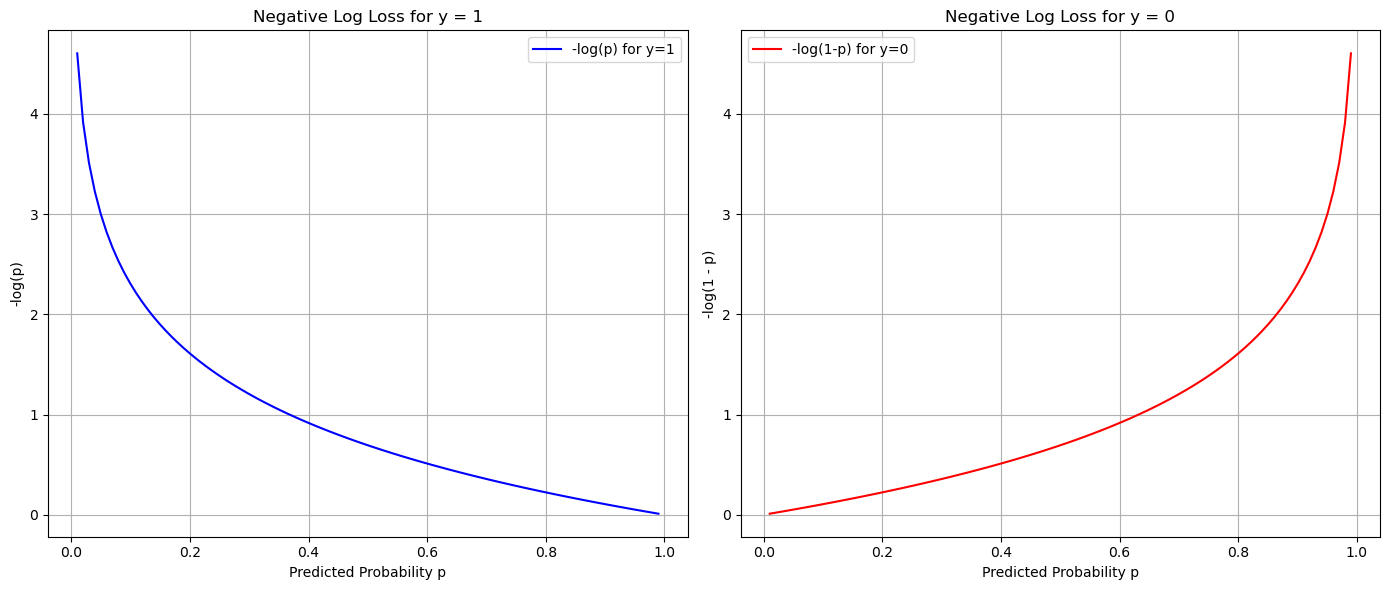

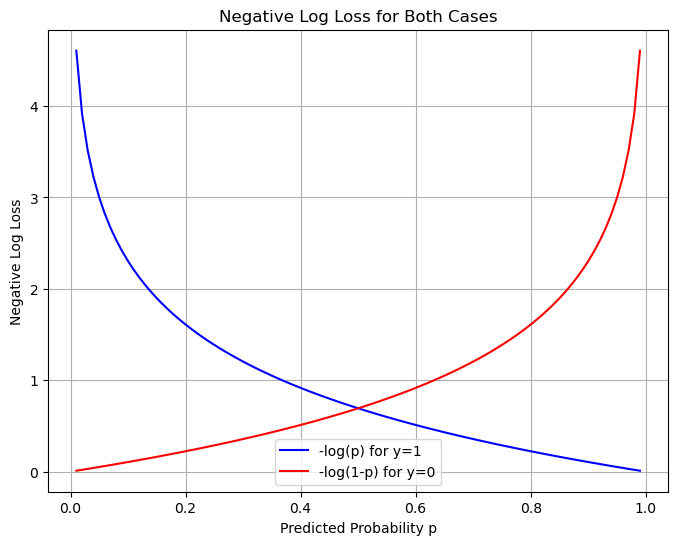

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of predicted probabilities
p = np.linspace(0.01, 0.99, 100)  # Avoid 0 and 1 to prevent log(0) issues

# Calculate the negative log likelihoods
neg_log_p = -np.log(p)  # For y = 1
neg_log_1_minus_p = -np.log(1 - p)  # For y = 0

# Plot individual graphs
plt.figure(figsize=(14, 6))

# Plot for y = 1
plt.subplot(1, 2, 1)
plt.plot(p, neg_log_p, label='-log(p) for y=1', color='blue')
plt.xlabel('Predicted Probability p')
plt.ylabel('-log(p)')
plt.title('Negative Log Loss for y = 1')
plt.grid(True)
plt.legend()

# Plot for y = 0
plt.subplot(1, 2, 2)
plt.plot(p, neg_log_1_minus_p, label='-log(1-p) for y=0', color='red')
plt.xlabel('Predicted Probability p')
plt.ylabel('-log(1 - p)')
plt.title('Negative Log Loss for y = 0')
plt.grid(True)
plt.legend()

# Show both plots
plt.tight_layout()
plt.show()

# Combined plot
plt.figure(figsize=(8, 6))
plt.plot(p, neg_log_p, label='-log(p) for y=1', color='blue')
plt.plot(p, neg_log_1_minus_p, label='-log(1-p) for y=0', color='red')
plt.xlabel('Predicted Probability p')
plt.ylabel('Negative Log Loss')
plt.title('Negative Log Loss for Both Cases')
plt.legend()
plt.grid(True)
plt.show()


# Q4

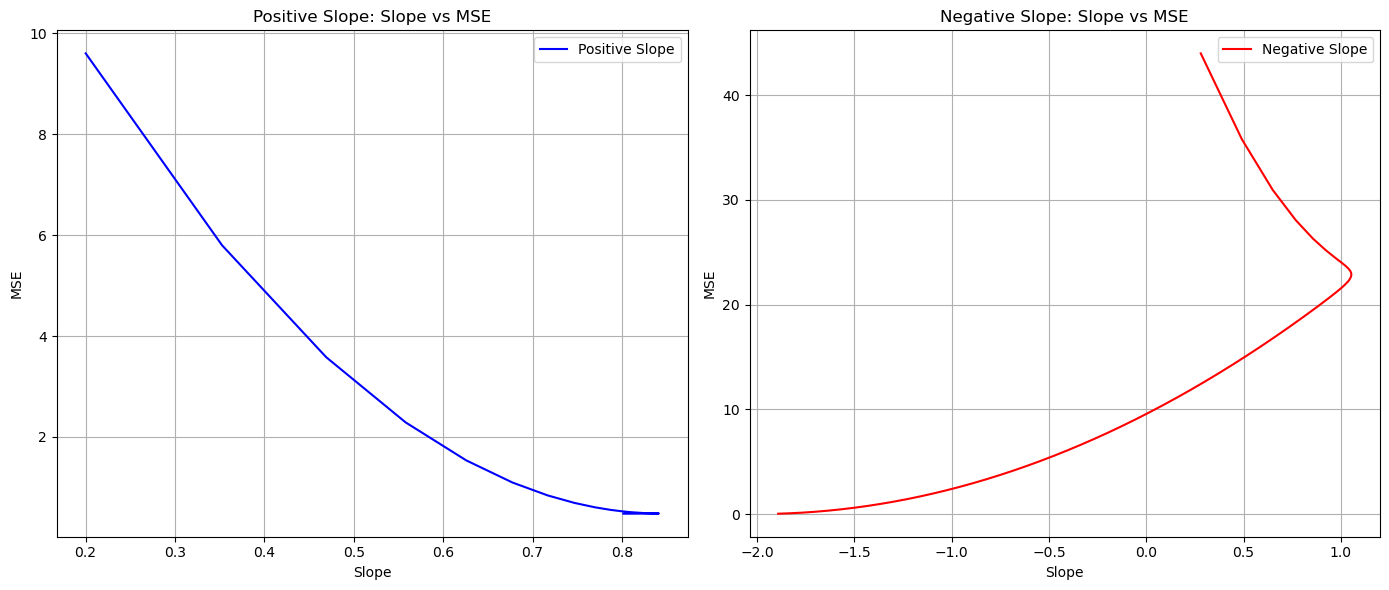

In [67]:
import numpy as np
import matplotlib.pyplot as plt

def gradient_descent(x, y, learning_rate=0.01, iterations=1000):
    m = len(x)  # Number of data points
    slope = 0
    intercept = 0
    slope_history = []
    mse_history = []
    
    for _ in range(iterations):
        # Compute predictions
        y_pred = slope * x + intercept
        
        # Compute Mean Squared Error (MSE)
        mse = np.mean((y - y_pred) ** 2)
        mse_history.append(mse)
        
        # Compute gradients
        slope_gradient = -2 * np.sum(x * (y - y_pred)) / m
        intercept_gradient = -2 * np.sum(y - y_pred) / m
        
        # Update parameters
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        # Record slope and mse
        slope_history.append(slope)
    
    return slope_history, mse_history

# Data for positive slope
x_pos = np.array([1, 2, 4, 3, 5])
y_pos = np.array([1, 3, 3, 2, 5])

# Data for negative slope
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([10, 8, 6, 4, 2])

# Run gradient descent
slope_pos, mse_pos = gradient_descent(x_pos, y_pos)
slope_neg, mse_neg = gradient_descent(x_neg, y_neg)

# Plot Slope vs MSE for positive slope
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_pos, mse_pos, label='Positive Slope', color='blue')
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('Positive Slope: Slope vs MSE')
plt.grid(True)
plt.legend()

# Plot Slope vs MSE for negative slope
plt.subplot(1, 2, 2)
plt.plot(slope_neg, mse_neg, label='Negative Slope', color='red')
plt.xlabel('Slope')
plt.ylabel('MSE')
plt.title('Negative Slope: Slope vs MSE')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()


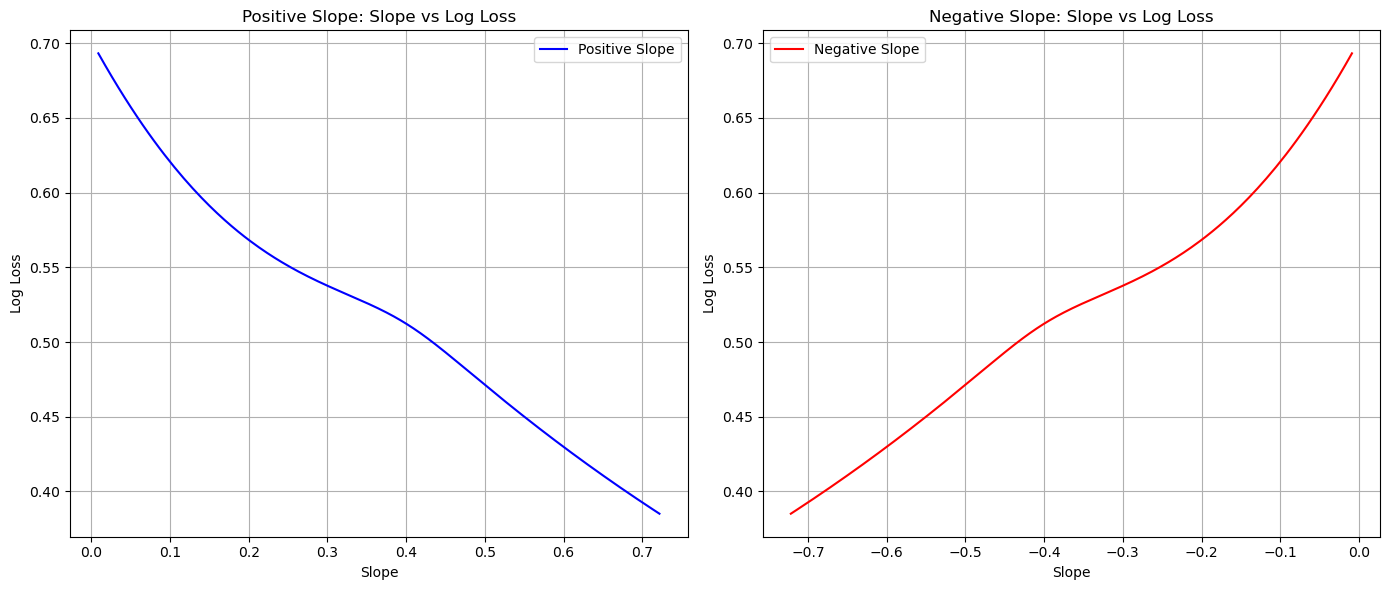

In [68]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_log_loss(y_true, y_pred_prob):
    # Avoid log(0) by clipping probabilities
    epsilon = 1e-15
    y_pred_prob = np.clip(y_pred_prob, epsilon, 1 - epsilon)
    return -np.mean(y_true * np.log(y_pred_prob) + (1 - y_true) * np.log(1 - y_pred_prob))

def gradient_descent_logistic(x, y, learning_rate=0.01, iterations=1000):
    m = len(x)  # Number of data points
    slope = 0
    intercept = 0
    slope_history = []
    log_loss_history = []
    
    x = x.reshape(-1, 1)  # Ensure x is a column vector
    X = np.hstack([x, np.ones_like(x)])  # Add intercept term
    
    for _ in range(iterations):
        # Compute predictions
        z = X @ np.array([slope, intercept])
        y_pred_prob = sigmoid(z)
        
        # Compute log loss
        log_loss_value = compute_log_loss(y, y_pred_prob)
        log_loss_history.append(log_loss_value)
        
        # Compute gradients
        error = y_pred_prob - y
        slope_gradient = np.dot(X[:, 0], error) / m
        intercept_gradient = np.sum(error) / m
        
        # Update parameters
        slope -= learning_rate * slope_gradient
        intercept -= learning_rate * intercept_gradient
        
        # Record slope
        slope_history.append(slope)
    
    return slope_history, log_loss_history

# Data for positive slope
x_pos = np.array([1, 2, 3, 4, 5])
y_pos = np.array([0, 0, 1, 1, 1])

# Data for negative slope
x_neg = np.array([1, 2, 3, 4, 5])
y_neg = np.array([1, 1, 0, 0, 0])

# Run gradient descent
slope_pos, log_loss_pos = gradient_descent_logistic(x_pos, y_pos)
slope_neg, log_loss_neg = gradient_descent_logistic(x_neg, y_neg)

# Plot Slope vs Log Loss for positive slope
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(slope_pos, log_loss_pos, label='Positive Slope', color='blue')
plt.xlabel('Slope')
plt.ylabel('Log Loss')
plt.title('Positive Slope: Slope vs Log Loss')
plt.grid(True)
plt.legend()

# Plot Slope vs Log Loss for negative slope
plt.subplot(1, 2, 2)
plt.plot(slope_neg, log_loss_neg, label='Negative Slope', color='red')
plt.xlabel('Slope')
plt.ylabel('Log Loss')
plt.title('Negative Slope: Slope vs Log Loss')
plt.grid(True)
plt.legend()

# Show plots
plt.tight_layout()
plt.show()
